In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  # set the plotting style to ggplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings;
warnings.filterwarnings('ignore');

In [41]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [42]:
df.shape

(7043, 21)

In [43]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
308,3167-SNQPL,Male,1,Yes,Yes,38,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,3741.85,No
6162,9000-PLFUZ,Female,1,Yes,No,60,No,No phone service,DSL,No,...,No,No,Yes,Yes,Two year,Yes,Credit card (automatic),49.45,2907.55,No
2032,3753-TSEMP,Female,0,Yes,No,15,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,88.15,1390.6,Yes
2301,4813-HQMGZ,Female,0,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,90.25,743.75,No
1675,6311-UEUME,Female,0,No,No,29,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.90,2384.15,Yes


In [44]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
# little cleaning to start

df = df.drop(columns=['customerID'])

In [46]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [47]:
df2 = df.copy()

In [48]:
cols = ['PhoneService','MultipleLines','InternetService',
        'OnlineSecurity','OnlineBackup','DeviceProtection',
        'TechSupport','StreamingTV','StreamingMovies']

for columns in cols:
    df2[columns] = df2[columns].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)


In [49]:
df2['count_of_services'] = df2.apply(lambda row: row.PhoneService + row.MultipleLines +
                                     row.InternetService + row.OnlineSecurity + row.OnlineBackup + 
                                     row.DeviceProtection + row.TechSupport + row.StreamingTV + row.StreamingMovies, axis=1)

df['count_of_services'] = df2['count_of_services']

In [50]:
cols = ['Churn']

for columns in cols:
    df[columns] = df[columns].apply(lambda x: 0 if x == 'No' else 1)

#     , 'Partner', 'Dependents', 'PhoneService', 
#         'MultipleLines', 'PaperlessBilling'

    
# cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']    
# for columns in cols2:
#     df[columns] = df[columns].apply(lambda x: 0 if x == 'No')

    
# df['gender'] = df['gender'].apply(lambda x: 0 if x == 'Female' else 0)    
# df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [51]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [52]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [53]:
#Tenure to categorical column
def tenure_lab(df) :
    
    if df["tenure"] <= 6 :
        return "Tenure_0-6"
    elif (df["tenure"] > 6) & (df["tenure"] <= 12 ):
        return "Tenure_6-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 18 ):
        return "Tenure_12-18"
    elif (df["tenure"] > 18) & (df["tenure"] <= 24 ):
        return "Tenure_18-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 30 ):
        return "Tenure_24-30"
    elif (df["tenure"] > 30) & (df["tenure"] <= 36 ):
        return "Tenure_30-36"
    elif (df["tenure"] > 36) & (df["tenure"] <= 42) :
        return "Tenure_36-42"
    elif (df["tenure"] > 42) & (df["tenure"] <= 48) :
        return "Tenure_42-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 54 ):
        return "Tenure_48-54"
    elif (df["tenure"] > 54) & (df["tenure"] <= 60 ):
        return "Tenure_54-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),
                                      axis = 1)

df = df.drop('tenure', axis = 1)

In [54]:
cat_features = df.select_dtypes(include = ["object"]).columns
num_features = df.select_dtypes(exclude = ["object"]).columns

In [55]:
cat_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'tenure_group'],
      dtype='object')

In [56]:
df = pd.get_dummies(df, columns = cat_features)

In [57]:
df.shape

(7043, 57)

In [58]:
# df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
# df['TotalCharges'] = np.log(df['TotalCharges'])

In [59]:
df[['TotalCharges', 'MonthlyCharges']].head(10)

,TotalCharges,MonthlyCharges
0,29.85,29.85
1,1889.50,56.95
2,108.15,53.85
3,1840.75,42.30
4,151.65,70.70
5,820.50,99.65
6,1949.40,89.10
7,301.90,29.75
8,3046.05,104.80
9,3487.95,56.15


In [60]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)


# Find correlations with the target and sort
correlations = df.corr()['Churn'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))


Most Positive Correlations:
 MultipleLines_Yes                 0.040102
StreamingMovies_Yes               0.061382
StreamingTV_Yes                   0.063228
tenure_group_Tenure_6-12          0.070623
StreamingTV_No                    0.128916
StreamingMovies_No                0.130845
Partner_No                        0.150448
SeniorCitizen                     0.150889
Dependents_No                     0.164221
PaperlessBilling_Yes              0.191825
MonthlyCharges                    0.193356
DeviceProtection_No               0.252481
OnlineBackup_No                   0.268005
PaymentMethod_Electronic check    0.301919
InternetService_Fiber optic       0.308020
tenure_group_Tenure_0-6           0.308539
TechSupport_No                    0.337281
OnlineSecurity_No                 0.342637
Contract_Month-to-month           0.405103
Churn                             1.000000
Name: Churn, dtype: float64

Most Negative Correlations:
 Contract_Two year                         -0.302253
S

In [61]:
df = df[~df['TotalCharges'].isnull()]


In [62]:
X = df.drop('Churn', axis = 1)
Y = df['Churn']


In [63]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.10, shuffle = True, 
                                                    random_state = 123)

print(f"Original data shapes: {X_train.shape, X_test.shape}")



Original data shapes: ((6328, 56), (704, 56))


In [65]:
# Function to plot the learning curve - checking for overfitting

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Logistic Reg.

In [66]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Logistic

param_grid = {'C': np.power(10.0, np.arange(-10, 10))}
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

best_model = clf.fit(X_train, y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Penalty: l2
Best C: 1.0


In [67]:
logistic = LogisticRegression(penalty = 'l2', 
                              C = 1)

pip_baseline = make_pipeline(RobustScaler(), logistic)
scores = cross_val_score(pip_baseline,
                         X_train, y_train,
                         scoring = "roc_auc", cv = 5)

logistic.fit(X_train,y_train)

logistic_predictions = logistic.predict(X_test)
logistic_prob = logistic.predict_proba(X_test)

scores_log = cross_val_score(logistic,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)

print("\n========================================================")
print(" Results from Logistic Regression " )
print("========================================================")  
print("\n")
print(f"Logistic Regression model's average AUC: {scores_log.mean():.3f}")
print("\n")
print(classification_report(y_test, logistic_predictions))
print("\n========================================================")
print("\n")


print("\n")
print(f"Logistic Model's Accuracy Score is: {accuracy_score(y_test, logistic_predictions)}")
print(f"Logistic Model's Precision Score is {precision_score(y_test, logistic_predictions, average='weighted')}")
print("\n")


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


 Results from Logistic Regression 


Logistic Regression model's average AUC: 0.846


              precision    recall  f1-score   support

           0       0.82      0.93      0.88       502
           1       0.75      0.50      0.60       202

   micro avg       0.81      0.81      0.81       704
   macro avg       0.79      0.72      0.74       704
weighted avg       0.80      0.81      0.80       704






Logistic Model's Accuracy Score is: 0.8096590909090909
Logistic Model's Precision Score is 0.8029870087362231




<Figure size 1152x576 with 0 Axes>

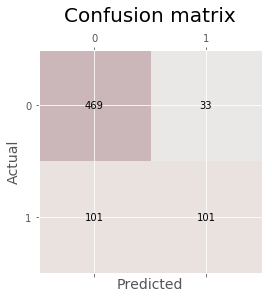

In [68]:
# Logistic Reg. Confusion Matrix
y_true = y_test
y_pred = logistic_predictions
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap = plt.cm.Reds, alpha=0.2)
for i in range(2):
    for j in range(2):
        plt.text(x = j, y = i, s = conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

<module 'matplotlib.pyplot' from '/Users/yuce/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

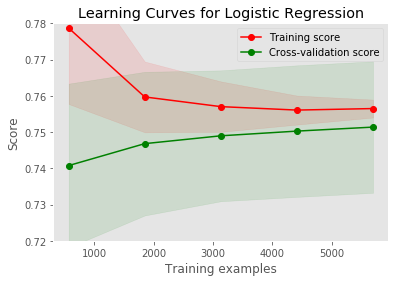

In [69]:
# Logistic Reg. Learning Curve

title = "Learning Curves for Logistic Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)

estimator = LogisticRegression(penalty = 'l2', C = 100, 
                                           class_weight= 'balanced')

plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.72, 0.78), cv=cv, n_jobs=4)
        

### Random Forest

In [70]:
# rfc = RandomForestClassifier(random_state=123)
# # rfc.fit(X_train,y_train)

# param_grid = { 
#     'n_estimators': [200, 500, 1000],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6],
#     'criterion' :['gini', 'entropy'],
#     'max_features' :[0.1, 0.25, 0.50, 1]
# }

# scorers = {
#     'precision_score': make_scorer(precision_score),
#     'recall_score': make_scorer(recall_score),
#     'accuracy_score': make_scorer(accuracy_score)
# }


# CV_rfc = GridSearchCV(estimator = rfc, scoring=scorers, param_grid = param_grid, cv = 10, refit = False)

# CV_rfc.fit(X_train, y_train)

In [82]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Ensemble classifier using samplers internally

brf = BalancedRandomForestClassifier(n_estimators = 100, 
                                     random_state=123,
                                     n_jobs = -1, 
                                     max_depth = 2, 
                                     criterion = 'gini')

pip_baseline = make_pipeline(RobustScaler(), brf)
scores = cross_val_score(pip_baseline,
                         X_train, y_train,
                         scoring = "roc_auc", cv = 10)


brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)


print("\n========================================================")
print(" Results from Balanced RF Model" )
print("========================================================")
print("\n")
print(f"Balanced RF Model's average AUC: {scores.mean():.3f}")
print("\n")
print(classification_report(y_test, y_pred_brf))
print("\n========================================================")

print("\n")
print(f"BRF Model's Accuracy Score is: {accuracy_score(y_true, y_pred_brf)}")
print(f"BRF Model's Precision Score is {precision_score(y_true, y_pred_brf, average='weighted')}")
print("\n")



BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                criterion='gini', max_depth=2, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=2, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                oob_score=False, random_state=123, replacement=False,
                sampling_strategy='auto', verbose=0, warm_start=False)


 Results from Balanced RF Model


Balanced RF Model's average AUC: 0.831


              precision    recall  f1-score   support

           0       0.88      0.69      0.78       502
           1       0.50      0.77      0.61       202

   micro avg       0.71      0.71      0.71       704
   macro avg       0.69      0.73      0.69       704
weighted avg       0.77      0.71      0.73       704




BRF Model's Accuracy Score is: 0.7144886363636364
BRF Model's Precision Score is 0.7735319447760539




In [78]:
# Plot features importance

importances = brf.feature_importances_
indices = np.argsort(brf.feature_importances_)[::-1]

feat_imp = pd.Series(importances[indices], df.columns[df.columns != "Churn"][indices])

print("\n========================================================")
print("Feature Importance" )
print("========================================================")
print("\n")

print(feat_imp)


Feature Importance


Contract_Month-to-month                    0.179951
OnlineSecurity_No                          0.082114
TotalCharges                               0.078465
Contract_Two year                          0.074354
tenure_group_Tenure_0-6                    0.060777
TechSupport_No                             0.058934
InternetService_Fiber optic                0.057581
MonthlyCharges                             0.043263
PaymentMethod_Electronic check             0.036676
tenure_group_Tenure_gt_60                  0.031727
Contract_One year                          0.029139
OnlineBackup_No                            0.024853
OnlineSecurity_Yes                         0.019452
InternetService_DSL                        0.018054
TechSupport_No internet service            0.014180
TechSupport_Yes                            0.013555
OnlineBackup_No internet service           0.013141
InternetService_No                         0.012229
DeviceProtection_No internet service      

<Figure size 576x288 with 0 Axes>

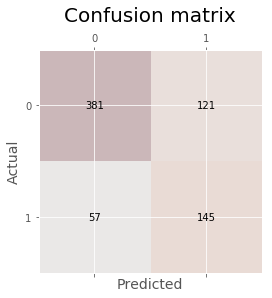

In [79]:
# Random Forest Confusion Matrix
y_true = y_test
conf_mat = confusion_matrix(y_true, y_pred_brf)
plt.figure(figsize=(8, 4))
plt.matshow(conf_mat, cmap = plt.cm.Reds, alpha=0.2)
for i in range(2):
    for j in range(2):
        plt.text(x = j, y = i, s = conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [74]:
# XGBoost Model
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic",
                    learning_rate=0.1,
                    n_estimators=200,
                    max_depth=2,
                    subsample=0.7,
                    random_state=123,
                    colsample_bytree = 0.7,
                    gamma = 0.1,
                    min_child_weight = 6,
                    reg_alpha = 0.01)

pip_baseline = make_pipeline(RobustScaler(), xgb)
scores_xgb = cross_val_score(pip_baseline,
                         X_train, y_train,
                         scoring = "roc_auc", cv = 5)

'''
RobustScaler: Standarization will be less influenced by the outliers, 
i.e. more robust. It centers the data around the median and 
scale it using interquartile range (IQR)
'''

# fit XGB to plot feature importances
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_test)

print("\n========================================================")
print(" Results from XGBoost " )
print("========================================================")
print("\n")
print(f"XGB's average AUC: {scores_xgb.mean():.3f}")
print("\n")
print(classification_report(y_test, xgb_predictions))
print("\n========================================================")
print("\n")
print(f"XGBoost's Accuracy Score is: {accuracy_score(y_true, y_pred)}")
print(f"XGBoost's Precision Score is {precision_score(y_true, y_pred, average='weighted')}")
print("\n")

'\nRobustScaler: Standarization will be less influenced by the outliers, \ni.e. more robust. It centers the data around the median and \nscale it using interquartile range (IQR)\n'

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=6, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=123, reg_alpha=0.01,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)


 Results from XGBoost 


XGB's average AUC: 0.848


              precision    recall  f1-score   support

           0       0.81      0.93      0.87       502
           1       0.72      0.47      0.57       202

   micro avg       0.80      0.80      0.80       704
   macro avg       0.77      0.70      0.72       704
weighted avg       0.79      0.80      0.78       704




XGBoost's Accuracy Score is: 0.8096590909090909
XGBoost's Precision Score is 0.8029870087362231




<Figure size 1152x576 with 0 Axes>

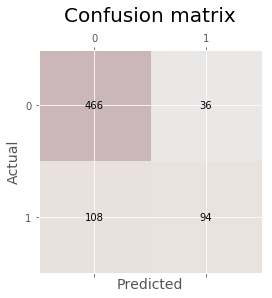

In [75]:
# XGBoost Confusion Matrix
y_true = y_test
y_pred = xgb_predictions
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(16, 8))
plt.matshow(conf_mat, cmap = plt.cm.Reds, alpha=0.2)
for i in range(2):
    for j in range(2):
        plt.text(x = j, y = i, s = conf_mat[i, j], ha="center", va="center")
plt.title("Confusion matrix", y=1.1, fontdict={"fontsize": 20})
plt.xlabel("Predicted", fontdict={"fontsize": 14})
plt.ylabel("Actual", fontdict={"fontsize": 14});

In [76]:
# First Run Scores
# Baseline: 0.74
# LR: 0.845
# RF: 0.832
# XG: 0.844

# Second Run Scores - skipped log of charges & test size at 0.15
# Baseline: 0.74
# LR: 0.845
# RF: 0.836
# XG: 0.846

# Third Run Scores - skipped log of charges & test size at 0.15
# Baseline: 0.74
# LR: 0.845
# RF: 0.836
# XG: 0.846


# Fourth Run Scores - skipped log of charges & test size at 0.15 & undummified data for rf
# Baseline: 0.74
# LR: 0.845
# RF: 0.836
# XG: 0.846

